In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## PREPROCESSING

In [4]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

## RANDOM PRINT

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], shape=(10,), dtype=float32)


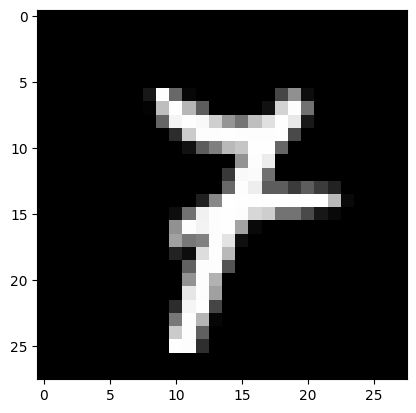

In [7]:
random_val = random.randint(0, len(x_train))
plt.imshow(x_train[random_val], cmap='gray')
print(y_train[random_val])

In [8]:
batch_size = 150
num_classes = 10
epochs = 5

In [298]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.1
)
datagenFINE = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.05
)

datagen.fit(x_train)
datagenFINE.fit(x_train)

## Making the Model

In [282]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding='same', strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_150 (Conv2D)             │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_175         │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_151 (Conv2D)             │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_176         │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_152 (Conv2D)             │ (None, 14, 14, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_177         │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_153 (Conv2D)             │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_178         │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_154 (Conv2D)             │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_179         │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_155 (Conv2D)             │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_180         │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_181         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,866 (1.59 MB)

 Trainable params: 417,034 (1.59 MB)

 Non-trainable params: 832 (3.25 KB)

In [300]:
from tensorflow.keras.models import clone_model
from sklearn.metrics import accuracy_score

num_models = 5
#ensemble_models = [clone_model(model) for _ in range(num_models)]

for ensemble_model in ensemble_models:
    ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
for ensemble_model in ensemble_models:
    #ensemble_model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=5)
    ensemble_model.fit(datagenFINE.flow(x_train, y_train, batch_size=batch_size), epochs=1)
    
def ensemble_predict(models, x):
    predictions = [model.predict(x) for model in models]
    return np.mean(predictions, axis=0)

ensemble_predictions = ensemble_predict(ensemble_models, x_test)

ensemble_pred_labels = np.argmax(ensemble_predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(true_labels, ensemble_pred_labels)
print(f'Ensemble accuracy: {accuracy * 100:.4f}%')

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.9869 - loss: 0.0425
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9878 - loss: 0.0389
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9871 - loss: 0.0420
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step - accuracy: 0.9876 - loss: 0.0415
400/400 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9870 - loss: 0.0431
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Ensemble accuracy: 99.6500%


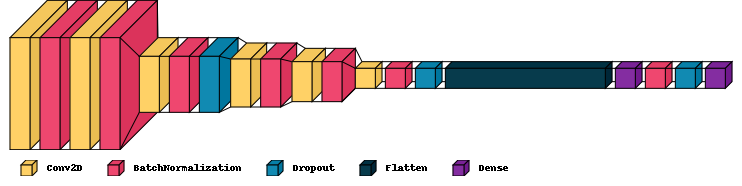

In [283]:
#!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

## Training Model 5+6 times

In [284]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=6,
                    validation_split=0.05)

Epoch 1/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8113 - loss: 0.6151 - val_accuracy: 0.4417 - val_loss: 2.5457
Epoch 2/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9791 - loss: 0.0682 - val_accuracy: 0.9870 - val_loss: 0.0456
Epoch 3/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9834 - loss: 0.0541 - val_accuracy: 0.9878 - val_loss: 0.0392
Epoch 4/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9883 - loss: 0.0395 - val_accuracy: 0.9907 - val_loss: 0.0337
Epoch 5/5
360/360 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9891 - loss: 0.0366 - val_accuracy: 0.9912 - val_loss: 0.0320
Epoch 1/6
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9920 - val_loss: 0.0251
Epoch 2/6
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9907 - val_loss: 0.0304
Epoch 3/6
380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9919 - loss: 0.0246 - val_accuracy: 0

In [285]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9927 - loss: 0.0215


[0.019457096233963966, 0.9933000206947327]

## Extra Fitting for Max Accuracy

In [293]:
new_hist = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=1,
                    validation_split=0.05)
model.evaluate(x_test, y_test)

380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9965 - loss: 0.0127 - val_accuracy: 0.9950 - val_loss: 0.0232
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9943 - loss: 0.0190


[0.01663747802376747, 0.995199978351593]

## Saving best Model

In [295]:
model.save('CNN.keras')